In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train=pd.read_csv("/content/train_0irEZ2H.csv")
test=pd.read_csv("/content/test_nfaJ3J5.csv")

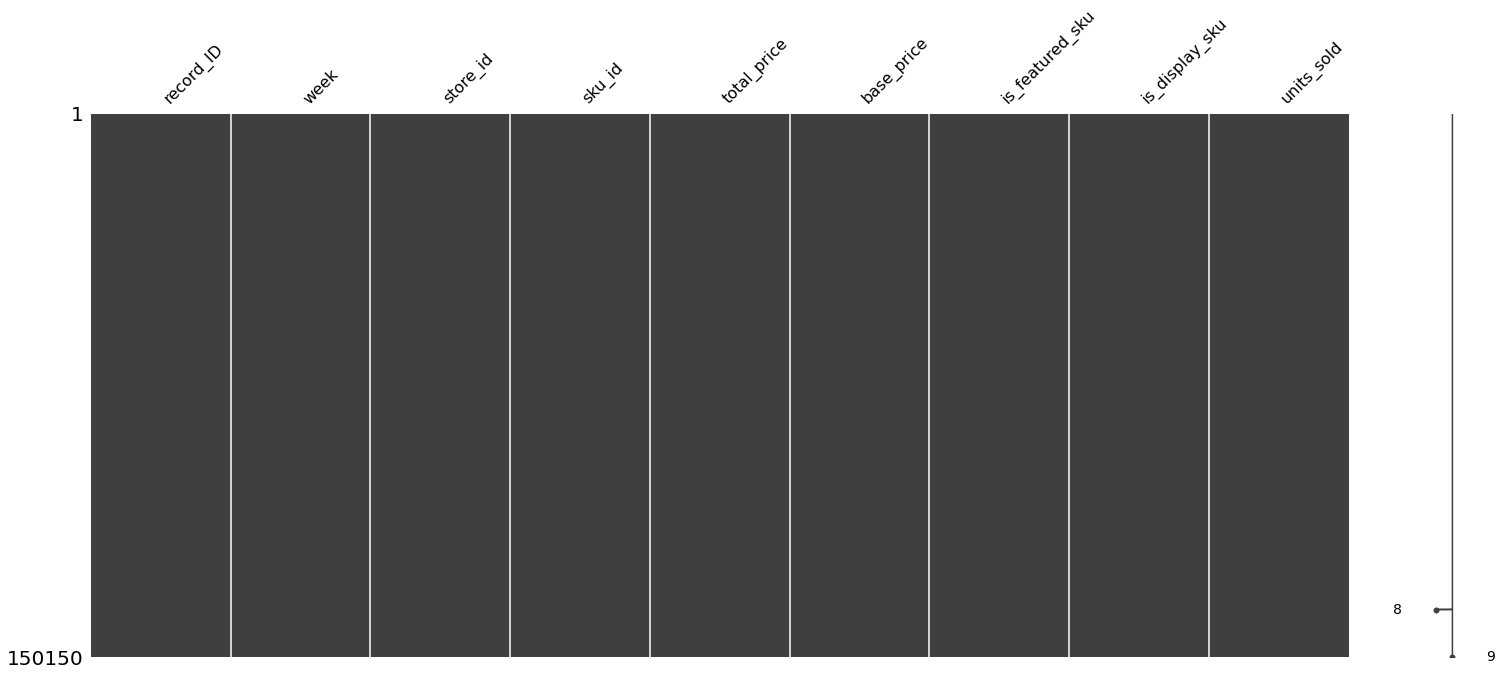

In [ ]:
import missingno as msno
msno.matrix(train)

In [ ]:
target=train.pop("units_sold")

In [ ]:
data=pd.concat([train,test],ignore_index=True)

In [ ]:
data

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0
...,...,...,...,...,...,...,...,...
164005,232281,01/10/13,9984,223245,241.5375,241.5375,0,0
164006,232282,01/10/13,9984,223153,240.8250,240.8250,0,0
164007,232285,01/10/13,9984,245338,382.6125,401.8500,1,1
164008,232286,01/10/13,9984,547934,191.6625,191.6625,0,0


In [ ]:
data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [ ]:
data["total_price"]=data["total_price"].fillna(train["total_price"].mean())

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


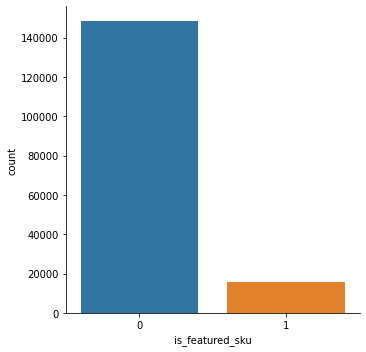

In [ ]:
sns.factorplot(x='is_featured_sku',data=data,kind='count',size=5,aspect=1) 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


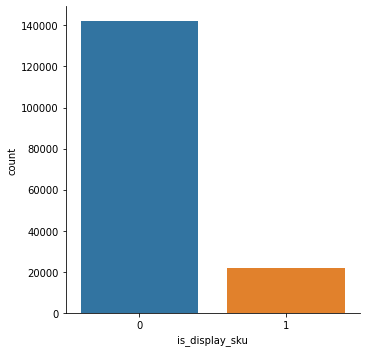

In [ ]:
sns.factorplot(x='is_display_sku',data=data,kind='count',size=5,aspect=1) 

In [ ]:
data.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
count,164010.000000,164010.000000,164010.000000,164010.000000,164010.000000,164010.000000,164010.000000
mean,116090.309664,9199.422511,254761.132468,207.096790,219.805933,0.094848,0.133211
std,67059.235114,615.591271,85547.282373,102.499194,110.351869,0.293006,0.339804
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000
25%,57989.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000
50%,116054.500000,9371.000000,222087.000000,198.787500,208.050000,0.000000,0.000000
75%,174176.750000,9731.000000,245338.000000,234.412500,235.837500,0.000000,0.000000
max,232287.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000


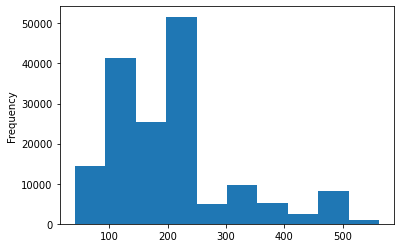

In [ ]:
data["total_price"].plot.hist()

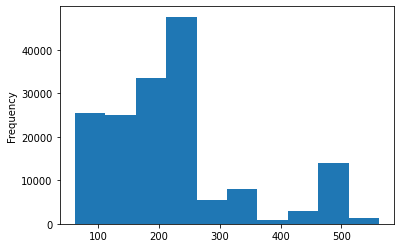

In [ ]:
data["base_price"].plot.hist()

In [ ]:
data["total_price"]=(np.log1p(data["total_price"]))

In [ ]:
data["base_price"]=(np.log1p(data["base_price"]))

In [ ]:
data["week"]=pd.DatetimeIndex(data["week"])

In [ ]:
data.dtypes

record_ID                   int64
week               datetime64[ns]
store_id                    int64
sku_id                      int64
total_price               float64
base_price                float64
is_featured_sku             int64
is_display_sku              int64
dtype: object

In [ ]:
data

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,1,2011-01-17,8091,216418,4.605545,4.726170,0,0
1,2,2011-01-17,8091,216419,4.605545,4.605545,0,0
2,3,2011-01-17,8091,216425,4.904904,4.904904,0,0
3,4,2011-01-17,8091,216233,4.904904,4.904904,0,0
4,5,2011-01-17,8091,217390,4.956355,4.956355,0,0
...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,9984,223245,5.491156,5.491156,0,0
164006,232282,2013-01-10,9984,223153,5.488214,5.488214,0,0
164007,232285,2013-01-10,9984,245338,5.949633,5.998564,1,1
164008,232286,2013-01-10,9984,547934,5.260940,5.260940,0,0


In [ ]:
data["dayofweek"]=(data["week"]).dt.dayofweek

In [ ]:
data["month"]=(data["week"]).dt.month

In [ ]:
data["year"]=data["week"].dt.year

In [ ]:
data["year"]=data["year"].map({2011:0,2012:1,2013:2})

In [ ]:
data

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,dayofweek,month,year
0,1,2011-01-17,8091,216418,4.605545,4.726170,0,0,0,1,0
1,2,2011-01-17,8091,216419,4.605545,4.605545,0,0,0,1,0
2,3,2011-01-17,8091,216425,4.904904,4.904904,0,0,0,1,0
3,4,2011-01-17,8091,216233,4.904904,4.904904,0,0,0,1,0
4,5,2011-01-17,8091,217390,4.956355,4.956355,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,9984,223245,5.491156,5.491156,0,0,3,1,2
164006,232282,2013-01-10,9984,223153,5.488214,5.488214,0,0,3,1,2
164007,232285,2013-01-10,9984,245338,5.949633,5.998564,1,1,3,1,2
164008,232286,2013-01-10,9984,547934,5.260940,5.260940,0,0,3,1,2


In [ ]:
data["weekend"]=data["dayofweek"].map({5:1,6:1,4:0,3:0,2:0,1:0,0:0})

In [ ]:
data["total_price/base_price"]=data["total_price"]/data["base_price"]

In [ ]:
data["Day"]=data["week"].dt.day

In [ ]:
data["dayofyear"]=(data["week"]).dt.dayofyear

In [ ]:
data["Week"]=(data["week"]).dt.week

In [ ]:
data["quater"]=(data["week"]).dt.quarter

In [ ]:
data["is_month_start"]=(data["week"]).dt.is_month_start

In [ ]:
data["is_month_end"]=(data["week"]).dt.is_month_end

In [ ]:
data["Is_year_start"]=(data["week"]).dt.is_year_start

In [ ]:
data["Is_year_end"]=(data["week"]).dt.is_year_end

In [ ]:
data["weekday"]=data["dayofweek"].map({5:0,6:0,4:1,3:1,2:1,1:1,0:1})

In [ ]:
data["days_in_month"]=(data["week"]).dt.days_in_month

In [ ]:
data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,dayofweek,month,year,weekend,total_price/base_price,Day,dayofyear,Week,quater,is_month_start,is_month_end,Is_year_start,Is_year_end,weekday,days_in_month
0,1,2011-01-17,8091,216418,4.605545,4.726170,0,0,0,1,0,0,0.974477,17,17,3,1,False,False,False,False,1,31
1,2,2011-01-17,8091,216419,4.605545,4.605545,0,0,0,1,0,0,1.000000,17,17,3,1,False,False,False,False,1,31
2,3,2011-01-17,8091,216425,4.904904,4.904904,0,0,0,1,0,0,1.000000,17,17,3,1,False,False,False,False,1,31
3,4,2011-01-17,8091,216233,4.904904,4.904904,0,0,0,1,0,0,1.000000,17,17,3,1,False,False,False,False,1,31
4,5,2011-01-17,8091,217390,4.956355,4.956355,0,0,0,1,0,0,1.000000,17,17,3,1,False,False,False,False,1,31


In [ ]:
data.drop(["week","record_ID"],axis=1,inplace=True)

In [ ]:
data.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,dayofweek,month,year,weekend,total_price/base_price,Day,dayofyear,Week,quater,is_month_start,is_month_end,Is_year_start,Is_year_end,weekday,days_in_month
0,8091,216418,4.605545,4.726170,0,0,0,1,0,0,0.974477,17,17,3,1,False,False,False,False,1,31
1,8091,216419,4.605545,4.605545,0,0,0,1,0,0,1.000000,17,17,3,1,False,False,False,False,1,31
2,8091,216425,4.904904,4.904904,0,0,0,1,0,0,1.000000,17,17,3,1,False,False,False,False,1,31
3,8091,216233,4.904904,4.904904,0,0,0,1,0,0,1.000000,17,17,3,1,False,False,False,False,1,31
4,8091,217390,4.956355,4.956355,0,0,0,1,0,0,1.000000,17,17,3,1,False,False,False,False,1,31


In [ ]:
df=pd.get_dummies(data,columns=["is_month_end","is_month_start","Is_year_end","Is_year_start","store_id","sku_id"])

In [ ]:
df

,total_price,base_price,is_featured_sku,is_display_sku,dayofweek,month,year,weekend,total_price/base_price,Day,dayofyear,Week,quater,weekday,days_in_month,is_month_end_False,is_month_end_True,is_month_start_False,is_month_start_True,Is_year_end_False,Is_year_start_False,Is_year_start_True,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,...,store_id_9872,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,is_featured_sku_std,is_display_sku_std
0,4.605545,4.726170,0,0,0,1,0,0,0.974477,17,17,3,1,1,31,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.918941,42.427875
1,4.605545,4.605545,0,0,0,1,0,0,1.000000,17,17,3,1,1,31,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.918941,42.427875
2,4.904904,4.904904,0,0,0,1,0,0,1.000000,17,17,3,1,1,31,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.918941,42.427875
3,4.904904,4.904904,0,0,0,1,0,0,1.000000,17,17,3,1,1,31,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.918941,42.427875
4,4.956355,4.956355,0,0,0,1,0,0,1.000000,17,17,3,1,1,31,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.918941,42.427875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,5.491156,5.491156,0,0,3,1,2,0,1.000000,10,10,2,1,1,31,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.918941,42.427875
164006,5.488214,5.488214,0,0,3,1,2,0,1.000000,10,10,2,1,1,31,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.918941,42.427875
164007,5.949633,5.998564,1,1,3,1,2,0,0.991843,10,10,2,1,1,31,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,127.145692,109.185461
164008,5.260940,5.260940,0,0,3,1,2,0,1.000000,10,10,2,1,1,31,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,42.918941,42.427875


In [ ]:
train=pd.read_csv("/content/train_0irEZ2H.csv")

In [ ]:
std_encoding=train.groupby(['is_featured_sku']).agg({'units_sold':['std']}).reset_index()
df = df.merge(std_encoding,on='is_featured_sku',how="left")
df.rename(columns={('units_sold', 'std'):"is_featured_sku_std"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
std_encoding=train.groupby(['is_display_sku']).agg({'units_sold':['std']}).reset_index()
df = df.merge(std_encoding,on='is_display_sku',how="left")
df.rename(columns={('units_sold', 'std'):"is_display_sku_std"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
X_train=df[:150150]
X_test=df[150150:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_new, target, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [ ]:
tarrgetl_log=np.log1p(target)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
train_new = scaler.fit_transform(X_train)
test_new = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error,make_scorer

In [ ]:
def f1_weighted(y_true, y_pred):
    score = mean_squared_log_error(y_true, y_pred)
    return (np.sqrt(score)*1000)



# Neural Nets



In [ ]:

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=128, kernel_initializer='normal', activation='relu'))
model.add(Dense(1,activation="relu",kernel_initializer='normal'))
	# Compile model
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(),optimizer='adam')

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.01)
Earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
model.fit(X_train,y_train, epochs=40, batch_size=32, validation_data=(X_test,y_test), callbacks=[Earlystop], verbose=2)

Train on 100600 samples, validate on 49550 samples
Epoch 1/40
 - 5s - loss: 1.4370 - val_loss: 0.3096
Epoch 2/40
 - 4s - loss: 0.2784 - val_loss: 0.2519
Epoch 3/40
 - 4s - loss: 0.2386 - val_loss: 0.2257
Epoch 4/40
 - 4s - loss: 0.2169 - val_loss: 0.2090
Epoch 5/40
 - 4s - loss: 0.2034 - val_loss: 0.1993
Epoch 6/40
 - 4s - loss: 0.1953 - val_loss: 0.1934
Epoch 7/40
 - 4s - loss: 0.1901 - val_loss: 0.1893
Epoch 8/40
 - 4s - loss: 0.1865 - val_loss: 0.1864
Epoch 9/40
 - 4s - loss: 0.1834 - val_loss: 0.1843
Epoch 10/40
 - 4s - loss: 0.1810 - val_loss: 0.1817
Epoch 11/40
 - 5s - loss: 0.1789 - val_loss: 0.1802
Epoch 12/40
 - 5s - loss: 0.1770 - val_loss: 0.1791
Epoch 13/40
 - 4s - loss: 0.1756 - val_loss: 0.1774
Epoch 14/40
 - 4s - loss: 0.1744 - val_loss: 0.1762
Epoch 15/40
 - 4s - loss: 0.1732 - val_loss: 0.1757
Epoch 16/40
 - 4s - loss: 0.1723 - val_loss: 0.1744
Epoch 17/40
 - 4s - loss: 0.1714 - val_loss: 0.1739
Epoch 18/40
 - 4s - loss: 0.1706 - val_loss: 0.1730
Epoch 19/40
 - 4s - lo

In [ ]:
model.predict(test_new)

array([[25.75024 ],
       [21.313435],
       [17.994823],
       ...,
       [36.021954],
       [ 9.93877 ],
       [10.084221]], dtype=float32)

In [ ]:
pred=model.predict(test_new)

In [ ]:
sub=pd.read_csv("/content/sample_submission_pzljTaX.csv")

In [ ]:
sub["units_sold"]=pred

In [ ]:
sub.to_csv("nn14.csv",index=False)